In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
main_dir = r'C:\Users\kvsud\OneDrive\Desktop\ML\DL\Data'
train_dir = r'C:\Users\kvsud\OneDrive\Desktop\ML\DL\Data\train'

In [4]:
import os
landslide_count = len(os.listdir(os.path.join(train_dir, 'Landslide')))
non_landslide_count = len(os.listdir(os.path.join(train_dir, 'Non-landslides')))
print(f"Landslides: {landslide_count} images")
print(f"Non-landslides: {non_landslide_count} images")

Landslides: 770 images
Non-landslides: 820 images


In [5]:
# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,         # Normalize pixel values to [0, 1]
    rotation_range=20,       # Randomly rotate images
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,         # Apply shear transformation
    zoom_range=0.2,          # Randomly zoom into images
    horizontal_flip=True,    # Flip images horizontally
    validation_split=0.2     # Reserve 20% of images for validation
)

In [6]:
# Load images for training and validation using flow_from_directory
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),     # Resize images to 224x224 (suitable for ResNet, VGG, etc.)
    batch_size=32,              # Number of images to be yielded per batch
    class_mode='binary',        # Use 'binary' for two classes, 'categorical' for multi-class
    subset='training',          # Use this subset for training
    shuffle=True                # Shuffle images for randomness
)

Found 1272 images belonging to 2 classes.


In [7]:
print(f"Number of training samples: {train_data.samples}")

Number of training samples: 1272


In [8]:
val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),     # Resize images to 224x224
    batch_size=32,
    class_mode='binary',
    subset='validation',        # Use this subset for validation
    shuffle=True
)

Found 318 images belonging to 2 classes.


In [9]:
print(f"Classes: {train_data.class_indices}")
print(f"Number of training samples: {train_data.samples}")
print(f"Number of validation samples: {val_data.samples}")

Classes: {'Landslide': 0, 'Non-Landslides': 1}
Number of training samples: 1272
Number of validation samples: 318


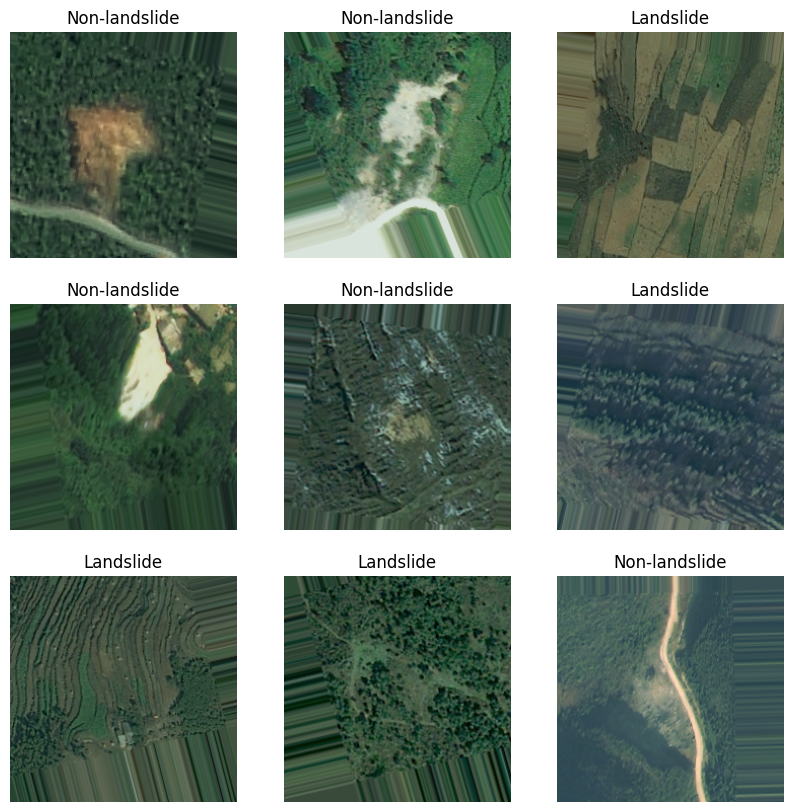

In [10]:
# Optional: If you want to see a batch of images
import scipy
import matplotlib.pyplot as plt

# Get a batch of training images
images, labels = next(train_data)

# Plot the first 9 images in the batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title("Landslide" if labels[i] == 1 else "Non-landslide")
    plt.axis('off')
plt.show()

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [13]:
# Define the CNN model
def create_cnn_model(input_shape=(224, 224, 3)):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # For binary classification
     # Compile the model
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [14]:

# Create and summarize the model
model = create_cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 173056)            0

In [15]:
# Train the model
history = model.fit(
    train_data,
    epochs=10,  # You can adjust the number of epochs
    validation_data=train_data,  # Use validation data from the data generator
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=train_data.samples // train_data.batch_size
)

Epoch 1/10
39/39 [==============================] - 119s 3s/step - loss: 0.7510 - accuracy: 0.5444 - val_loss: 0.6366 - val_accuracy: 0.7268
Epoch 2/10
39/39 [==============================] - 56s 1s/step - loss: 0.5890 - accuracy: 0.7234 - val_loss: 0.5399 - val_accuracy: 0.8005
Epoch 3/10
39/39 [==============================] - 54s 1s/step - loss: 0.4535 - accuracy: 0.7952 - val_loss: 0.4476 - val_accuracy: 0.7973
Epoch 4/10
39/39 [==============================] - 241s 6s/step - loss: 0.4413 - accuracy: 0.7903 - val_loss: 0.5294 - val_accuracy: 0.7885
Epoch 5/10
39/39 [==============================] - 174s 4s/step - loss: 0.4282 - accuracy: 0.8395 - val_loss: 0.3738 - val_accuracy: 0.8357
Epoch 6/10
39/39 [==============================] - 160s 4s/step - loss: 0.3462 - accuracy: 0.8605 - val_loss: 0.3122 - val_accuracy: 0.8742
Epoch 7/10
39/39 [==============================] - 190s 5s/step - loss: 0.3257 - accuracy: 0.8782 - val_loss: 0.2859 - val_accuracy: 0.8998
Epoch 8/10
39/3

In [16]:
model.evaluate(val_data)

10/10 [==============================] - 5s 447ms/step - loss: 0.5090 - accuracy: 0.7893


[0.5089862942695618, 0.7893081903457642]